# Data Description & Data Storytelling

Auto theft has become a pressing issue in Toronto and across the province, prompting both the Toronto Police Service and Ontario Provincial Police to address the problem. With a steady increase in car theft incidents, there's a growing demand for Car Theft Prevention Services aimed at safeguarding vehicles and ensuring the safety of vehicle owners. By analyzing available data on auto theft occurrences, we can identify areas with the highest incidence rates, enabling us to target surveillance efforts effectively in these high-risk zones. 


Implementing surveillance in high-incidence areas serves as a proactive measure to deter auto theft and apprehend perpetrators. Through strategic placement of surveillance cameras, law enforcement can closely monitor these areas, gathering crucial evidence on suspicious activities related to auto theft. By leveraging this data-driven approach, law enforcement agencies can enhance their ability to detect and respond to auto theft incidents swiftly, thereby contributing to the overall reduction of auto theft rates. 

Given the pivotal role in resource allocation and strategic planning within law enforcement agencies, it is fitting to direct this proposal towards the police chief. As a key decision-maker, the police chief holds the authority to enact measures aimed at crime prevention and public safety. Presenting the proposal to the police chief offers an opportunity to advocate for the allocation of surveillance resources to high-risk areas identified through data analysis. This collaborative approach empowers law enforcement to address auto theft more effectively, ultimately leading to safer communities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats

In [2]:
df = pd.read_csv('Auto_Theft_Open_Data.csv')


Source: TorontoPolice. (2023). Auto theft open data. Toronto Police Service Public Safety Data Portal. https://data.torontopolice.on.ca/datasets/TorontoPS::auto-theft-open-data/about 

# Statiscal Analysis

# Car Thefts by Location Type

Overall Mean: 1493.0731707317073
Overall Median: 29.0
Mode of the location type: Parking Lots (Apt., Commercial Or Non-Commercial) with a count of 20936
Total number of records: 61216


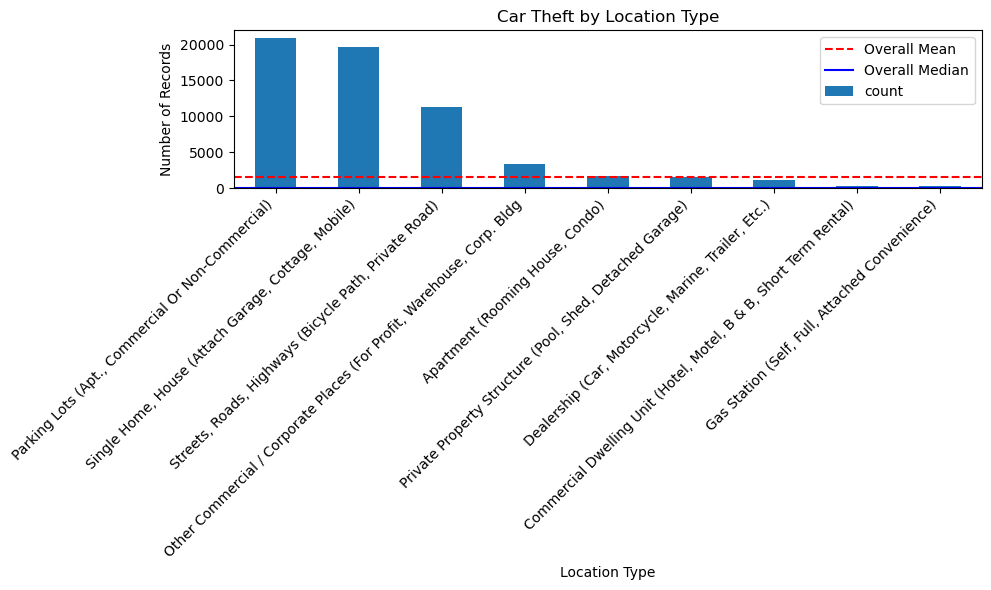

LOCATION_TYPE
Parking Lots (Apt., Commercial Or Non-Commercial)                         20936
Single Home, House (Attach Garage, Cottage, Mobile)                       19640
Streets, Roads, Highways (Bicycle Path, Private Road)                     11254
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg     3293
Apartment (Rooming House, Condo)                                           1716
Private Property Structure (Pool, Shed, Detached Garage)                   1561
Dealership (Car, Motorcycle, Marine, Trailer, Etc.)                        1178
Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)           323
Gas Station (Self, Full, Attached Convenience)                              279
Open Areas (Lakes, Parks, Rivers)                                           135
Bar / Restaurant                                                            116
Unknown                                                                     116
Other Non Commercial / Cor

In [3]:
# Group the data by 'location type' and count the occurrences
location_counts = df['LOCATION_TYPE'].value_counts()

# Filter out locations with counts less than 200
location_counts_filtered = location_counts[location_counts >= 200]

# Calculate the overall mean
overall_mean = location_counts.mean()
print("Overall Mean:", overall_mean)

#Calculate the overall median
median_by_location_type = location_counts.median()
print("Overall Median:", median_by_location_type)

#Calculate the mode of the location type
mode_by_location_type = location_counts.idxmax()
mod_count = location_counts.max()
print("Mode of the location type:", mode_by_location_type, "with a count of", mod_count)

# Print the total number of records
total_records = location_counts.sum()
print("Total number of records:", total_records)

# Plotting the graph
plt.figure(figsize=(10, 6))
location_counts_filtered.plot(kind='bar')
plt.axhline(overall_mean, color='red', linestyle='--', label='Overall Mean')
plt.axhline(median_by_location_type, color='blue', linestyle='solid', label='Overall Median')
plt.title('Car Theft by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print(location_counts)


**Above graph shows visualises the number of vehicle theft by location.**


It seems there might be a significant difference between the mean and the median values. This suggests that the distribution of the number of records for each location type is highly skewed, with a few location types having a very large number of records. We decided not to fix it because it is a natural characteristic of the data and represents the real world.

As we can see, the most common location type for vehicle theft is "Parking Lot/Garage" which is the mode. This information can be useful for law enforcement agencies to focus their efforts on these locations to prevent vehicle theft.

We filtered the data to ignore all location types with less than 200 records to make the graph more readable. This is because the number of records for these location types is too small to be statistically significant.

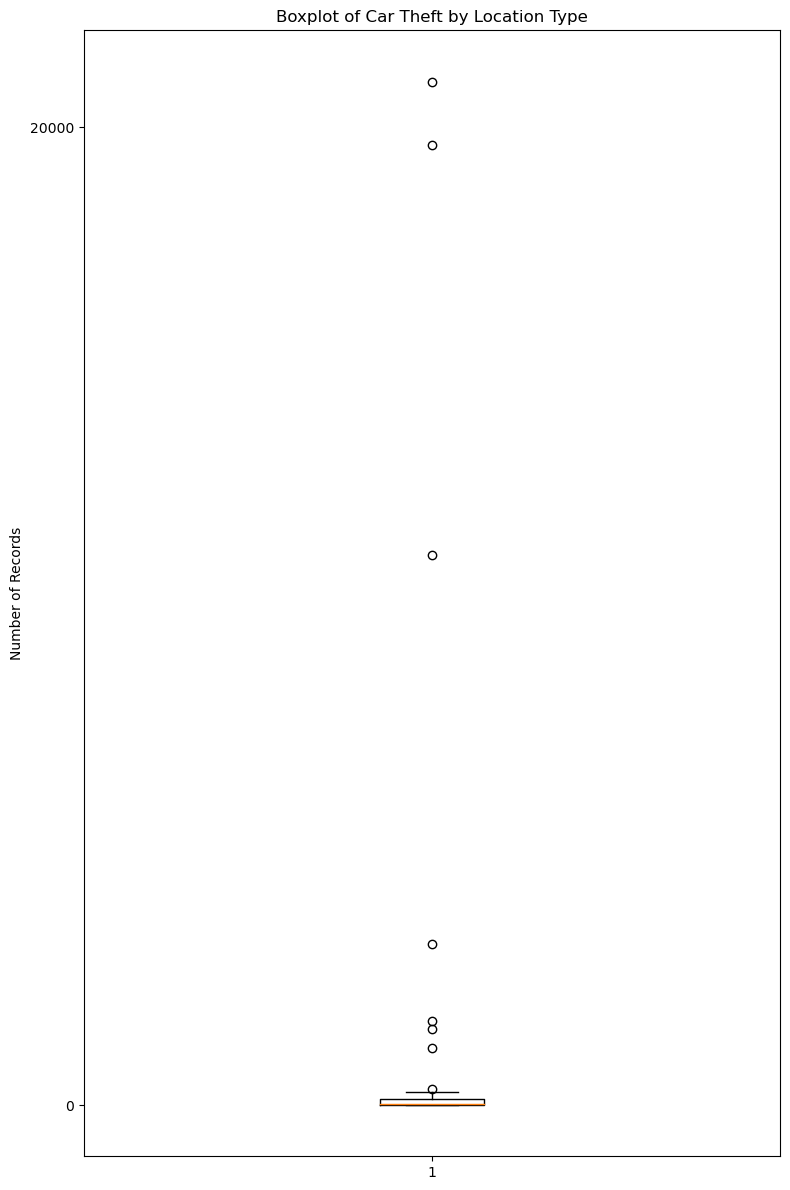

In [4]:
# Create a boxplot
plt.figure(figsize=(8, 12))
plt.boxplot(location_counts, vert=True, showfliers=True)  # Set showfliers=True to show outliers
plt.title('Boxplot of Car Theft by Location Type')
plt.ylabel('Number of Records')
plt.yticks(range(0, max(location_counts)+1, 20000))
plt.tight_layout()
plt.show()

It is very evident from the boxplot that the number of records for each location type is highly skewed.  There are a large number of outliers in the datset which just pinpoints the prime locations for the thefts.

In [5]:
# Group the data by 'location type' and count the occurrences
location_counts = df.groupby('LOCATION_TYPE').size()

# Calculate range peak to peak
data_range = np.ptp(location_counts)

# Calculate variance
data_variance = np.var(location_counts)

# Calculate standard deviation
data_std_dev = np.std(location_counts)

# Calculate trimmed mean
trimmed_mean_1_percent = np.mean(location_counts[1:-1])  # excluding 1% from both ends
trimmed_mean_2_5_percent = np.mean(location_counts[int(len(location_counts) * 0.025):int(len(location_counts) * 0.975)])  # excluding 2.5% from both ends

print("Range:", data_range)
print("Variance:", data_variance)
print("Standard Deviation:", data_std_dev)
print("1% Trimmed Mean:", trimmed_mean_1_percent)
print("2.5% Trimmed Mean:", trimmed_mean_2_5_percent)

Range: 20935
Variance: 21394676.604402144
Standard Deviation: 4625.437990547722
1% Trimmed Mean: 1522.6666666666667
2.5% Trimmed Mean: 1562.4473684210527


This just goes on to show how skewed the values are. The range of the number of records for each location type is very large, with the minimum being 1 and the maximum being 20936. This is another reason why we decided not to fix the skewness of the data. The same issue is also shown in the variance of the number of records for each location type.

In [6]:
# Calculate the first quartile (Q1)
Q1 = location_counts.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = location_counts.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identify outliers
outliers = (location_counts < lower_bound) | (location_counts > upper_bound)

# Remove outliers
location_counts_no_outliers = location_counts[~outliers]

# Print the cleaned data
print(location_counts_no_outliers)

#NUMERICAL ANALYSIS OF CLEANED DATA

mean_no_outliers = location_counts_no_outliers.mean()
median_no_outliers = location_counts_no_outliers.median()
mode_no_outliers = location_counts_no_outliers.idxmax()
mode_count = location_counts_no_outliers.max()
total_records_no_outliers = location_counts_no_outliers.sum()

print("CLEANED DATA")
print("Mean (no outliers):", mean_no_outliers)
print("Median (no outliers):", median_no_outliers)
print("Mode (no outliers):", mode_no_outliers, "with a count of", mode_count)
print("Total number of records (no outliers):", total_records_no_outliers)



LOCATION_TYPE
Bank And Other Financial Institutions (Money Mart, Tsx)                    39
Bar / Restaurant                                                          116
Cargo Train                                                                 2
Community Group Home                                                        4
Construction Site (Warehouse, Trailer, Shed)                               90
Convenience Stores                                                         58
Gas Station (Self, Full, Attached Convenience)                            279
Go Station                                                                 74
Go Train                                                                    1
Group Homes (Non-Profit, Halfway House, Social Agency)                      3
Homeless Shelter / Mission                                                  4
Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)     29
Nursing Home                                      

We tried cleaning up those outliers with the bigger counts to find out how insignificant the rest of the records are. We found out that the mean drops to 39.848 as opposed to 1493.5. This is a huge difference and shows how important those outliers are to the data. That is a whopping 97.33% drop in the mean. The mode is just 279 which is a lot less than the previous mode of over 20000. This is a 98.67% drop in the mode.

# Number of Auto Thefts by Hour

Mean: 2550.6666666666665
Median: 2259.5
Standard Deviation: 1656.102303778275
Mode: 7 th hour with a count of 6161


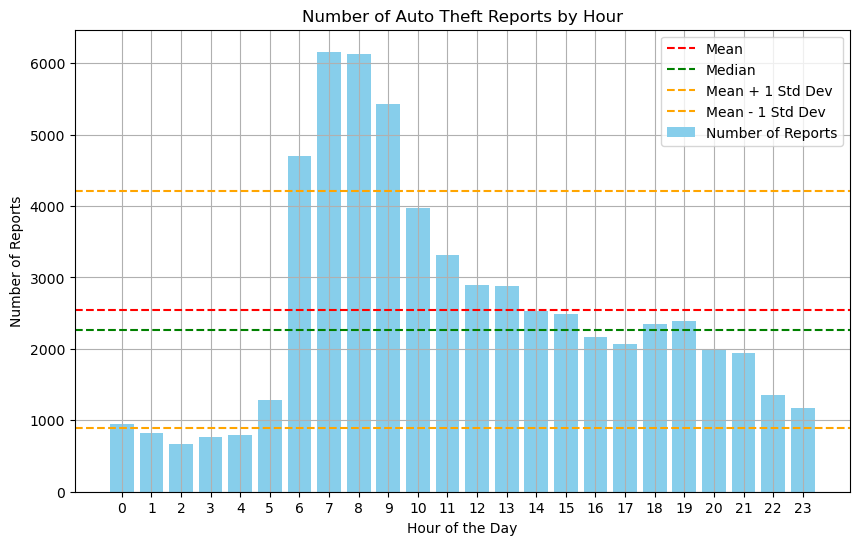

In [7]:
hourly_counts = df['REPORT_HOUR'].value_counts().sort_index()

# Calculate mean and median
mean_hourly_count = hourly_counts.mean()
median_hourly_count = hourly_counts.median()
standard_deviation = hourly_counts.std()

print("Mean:", mean_hourly_count)
print("Median:", median_hourly_count)
print("Standard Deviation:", standard_deviation)

# Calculate mode
mode_value = hourly_counts.idxmax()
print("Mode:", mode_value, "th hour", "with a count of", hourly_counts.max())


# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue', label='Number of Reports')
plt.axhline(mean_hourly_count, color='red', linestyle='--', label='Mean')
plt.axhline(median_hourly_count, color='green', linestyle='--', label='Median')
plt.axhline(mean_hourly_count + standard_deviation, color='orange', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(mean_hourly_count - standard_deviation, color='orange', linestyle='--', label='Mean - 1 Std Dev')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Reports')
plt.title('Number of Auto Theft Reports by Hour')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()

The provided statistics reveal valuable insights into the distribution and characteristics of car theft reports. With a mean of approximately 2550.67 and a median of 2259.5, it's evident that the distribution is right-skewed, indicating that a few hours experience disproportionately high counts of theft reports, thus pulling the mean upwards. The standard deviation of approximately 1656.10 underscores the wide dispersion of theft reports around the mean, suggesting significant variability across different hours. The mode, representing the 7th hour with a count of 6161 theft reports, highlights a distinct peak in car theft activity during this hour. These findings collectively suggest potential patterns and trends in theft occurrences, providing valuable insights for law enforcement and security measures aimed at preventing car theft incidents.


Since data points extend beyond +-1 SD from mean, there is greater variability in the distribution.

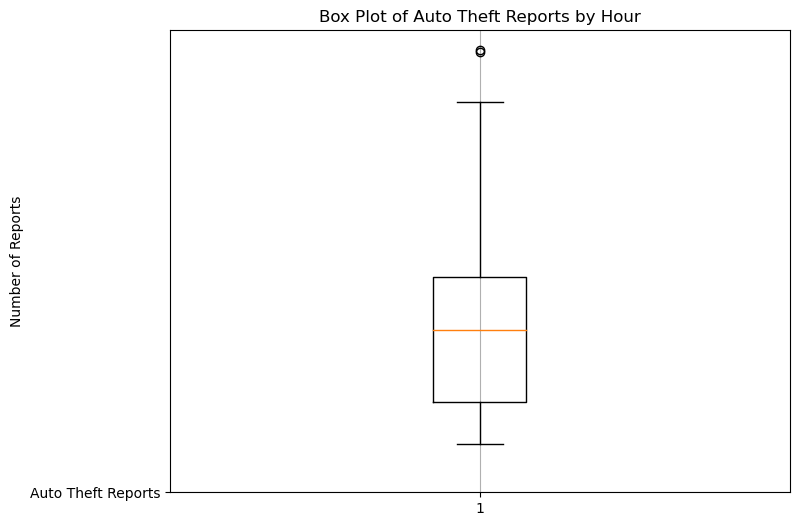

In [8]:
# Assuming hourly_counts is your DataFrame with hourly counts
hourly_counts = df['REPORT_HOUR'].value_counts().sort_index()

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(hourly_counts.values, vert=True, showfliers=True)
plt.yticks([1], ['Auto Theft Reports'])
plt.ylabel('Number of Reports')
plt.title('Box Plot of Auto Theft Reports by Hour')
plt.grid(True)
plt.show()

Correlation Coefficient: -0.017297873268232036


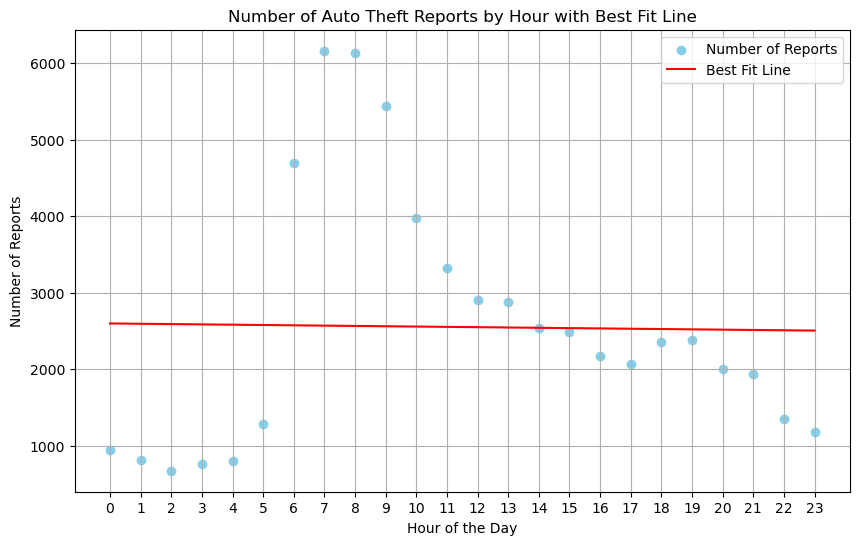

In [9]:
# Assuming hourly_counts is your DataFrame with hourly counts
hourly_counts = df['REPORT_HOUR'].value_counts().sort_index()

# Create arrays for hour of the day and number of reports
hours = hourly_counts.index
reports = hourly_counts.values

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(hours, reports)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

# Fit a linear regression line
fit_line = np.polyfit(hours, reports, 1)
fit_fn = np.poly1d(fit_line)

# Plot the data with the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(hours, reports, color='skyblue', label='Number of Reports')
plt.plot(hours, fit_fn(hours), color='red', label='Best Fit Line')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Reports')
plt.title('Number of Auto Theft Reports by Hour with Best Fit Line')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()

A correlation coefficient of approximately -0.017 suggests a very weak negative correlation between the hours of the day and the number of auto theft reports.

This negative correlation indicates that there is a slight tendency for the number of auto theft reports to decrease slightly as the hour of the day increases, but the relationship is extremely weak. In other words, there is almost no discernible linear relationship between the hour of the day and the number of auto theft reports.

Simple Random Sample

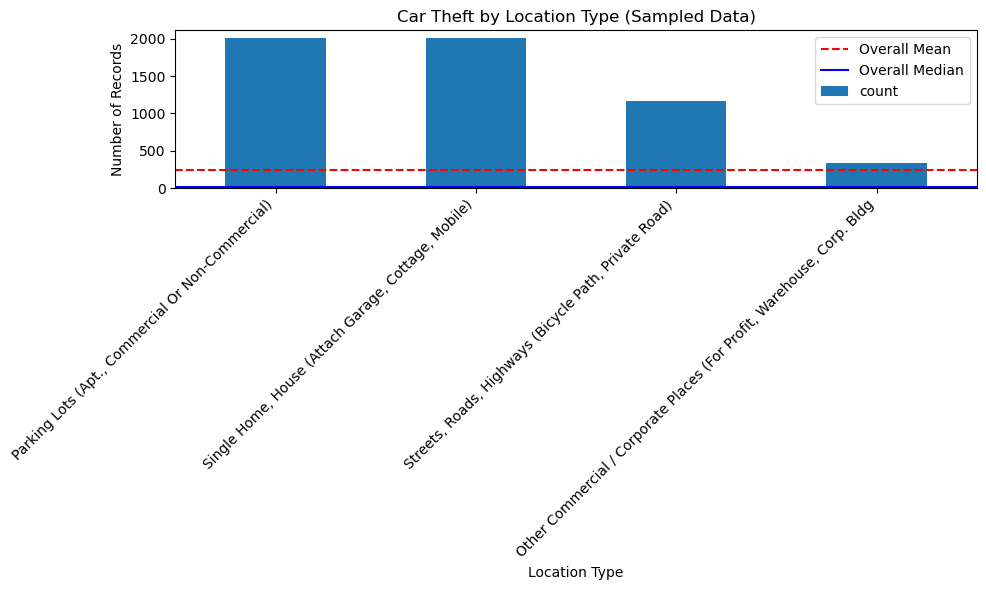

Overall Mean (Sampled): 235.42307692307693
Overall Median (Sampled): 11.0
Mode of the location type (Sampled): Parking Lots (Apt., Commercial Or Non-Commercial) with a count of 2012


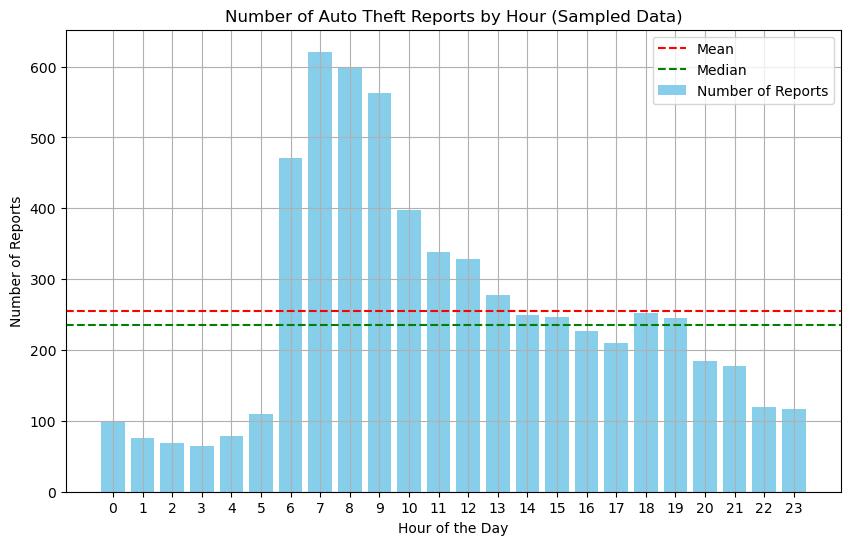

Mean (Sampled): 255.04166666666666
Median (Sampled): 236.0
Mode (Sampled): 7 th hour with a count of 621


In [10]:
sample_size = int(len(df) * 0.1)
sample_df = df.sample(sample_size, random_state=42)  # Random state for reproducibility

# Group the sampled data by 'location type' and count the occurrences
location_counts_sampled = sample_df['LOCATION_TYPE'].value_counts()

# Filter out locations with counts less than 200
location_counts_filtered_sampled = location_counts_sampled[location_counts_sampled >= 200]

# Calculate the overall mean, median, and mode for the sampled data
overall_mean_sampled = location_counts_sampled.mean()
median_by_location_type_sampled = location_counts_sampled.median()
mode_by_location_type_sampled = location_counts_sampled.idxmax()
mod_count_sampled = location_counts_sampled.max()

# Plotting the graph for the sampled data
plt.figure(figsize=(10, 6))
location_counts_filtered_sampled.plot(kind='bar')
plt.axhline(overall_mean_sampled, color='red', linestyle='--', label='Overall Mean')
plt.axhline(median_by_location_type_sampled, color='blue', linestyle='solid', label='Overall Median')
plt.title('Car Theft by Location Type (Sampled Data)')
plt.xlabel('Location Type')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Print the numerical analysis for the sampled data
print("Overall Mean (Sampled):", overall_mean_sampled)
print("Overall Median (Sampled):", median_by_location_type_sampled)
print("Mode of the location type (Sampled):", mode_by_location_type_sampled, "with a count of", mod_count_sampled)

# Repeat similar steps for hourly data (numerical and graphical analysis)
hourly_counts_sampled = sample_df['REPORT_HOUR'].value_counts().sort_index()
mean_hourly_count_sampled = hourly_counts_sampled.mean()
median_hourly_count_sampled = hourly_counts_sampled.median()
mode_value_sampled = hourly_counts_sampled.idxmax()

# Plotting the hourly data for the sampled data
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts_sampled.index, hourly_counts_sampled.values, color='skyblue', label='Number of Reports')
plt.axhline(mean_hourly_count_sampled, color='red', linestyle='--', label='Mean')
plt.axhline(median_hourly_count_sampled, color='green', linestyle='--', label='Median')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Reports')
plt.title('Number of Auto Theft Reports by Hour (Sampled Data)')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()

# Print the numerical analysis for hourly data from the sampled data
print("Mean (Sampled):", mean_hourly_count_sampled)
print("Median (Sampled):", median_hourly_count_sampled)
print("Mode (Sampled):", mode_value_sampled, "th hour", "with a count of", hourly_counts_sampled.max())

From the random sampling, we can observe that the overall mean for the number of auto theft by location types is so much lower because of the random sampling, only 10% of the population is selected. We can also observe that only 4 of the many location types is seen in the graph because they occur the most while the less occuring location types has a less chance of being selected. The median however is still the same, because the data is heavily left skewered, meaning that there are a lot of location types that has little auto theft. The distribution remains the same which is expected from the simple random sampling method. 
For the Number of auto theft by report hour, we can see that the mean and median of the sample is approximately 10% of the population which is expected to happen because 10% of the population is chosen. Similar to the number of auto theft by location types, we can see that the distribution of the number of auto theft is almost identical to that of the its' population. Both SRS graph has very similar distribution compared to the population.

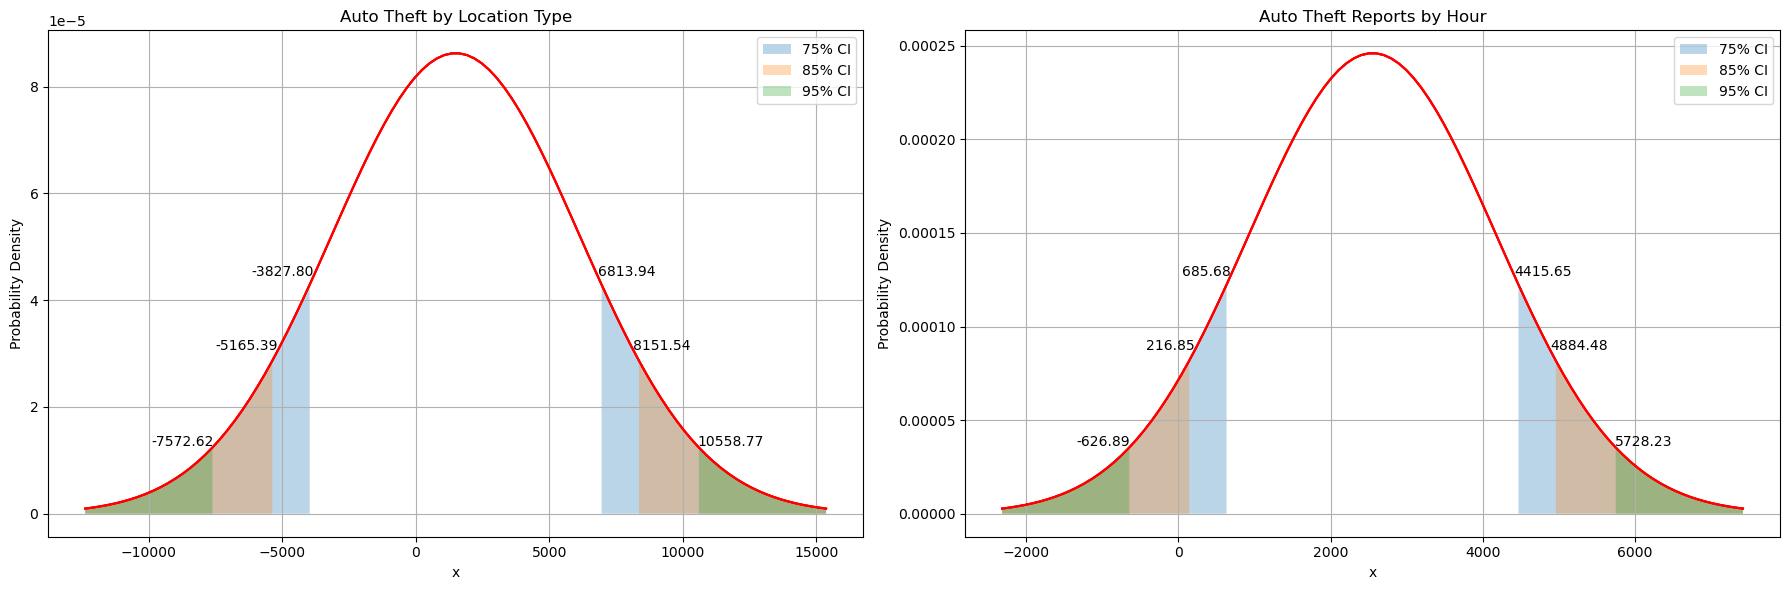

In [11]:
# Confidence levels
confidence_levels = [0.75, 0.85, 0.95]

# Calculate overall mean and standard deviation for each dataset
overall_mean_location_type = np.mean(location_counts)
overall_std_location_type = np.std(location_counts)
overall_mean_hourly = np.mean(hourly_counts)
overall_std_hourly = np.std(hourly_counts)

# Plotting car thefts by location type
plt.figure(figsize=(18, 6))

# Car thefts by location type
for i, confidence_level in enumerate(confidence_levels):
    plt.subplot(1, 2, 1)  # First subplot
    mu = overall_mean_location_type  # Mean of the distribution
    sigma = overall_std_location_type  # Standard deviation of the distribution
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)  # Generate 100 points within 3 standard deviations from the mean
    y = stats.norm.pdf(x, mu, sigma)  # Calculate the probability density function for each point
    lower_bound = mu - stats.norm.ppf(1 - (1 - confidence_level) / 2) * sigma
    upper_bound = mu + stats.norm.ppf(1 - (1 - confidence_level) / 2) * sigma
    plt.fill_between(x, 0, y, where=(x <= lower_bound) | (x >= upper_bound), alpha=0.3, label=f'{int(confidence_level*100)}% CI')
    plt.text(lower_bound, stats.norm.pdf(lower_bound, mu, sigma), f'{lower_bound:.2f}', horizontalalignment='right')
    plt.text(upper_bound, stats.norm.pdf(upper_bound, mu, sigma), f'{upper_bound:.2f}', horizontalalignment='left')
    plt.plot(x, y, 'r-')
    plt.title('Auto Theft by Location Type')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()

# Auto theft reports by hour
for i, confidence_level in enumerate(confidence_levels):
    plt.subplot(1, 2, 2)  # Second subplot
    mu = overall_mean_hourly  # Mean of the distribution
    sigma = overall_std_hourly  # Standard deviation of the distribution
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)  # Generate 100 points within 3 standard deviations from the mean
    y = stats.norm.pdf(x, mu, sigma)  # Calculate the probability density function for each point
    lower_bound = mu - stats.norm.ppf(1 - (1 - confidence_level) / 2) * sigma
    upper_bound = mu + stats.norm.ppf(1 - (1 - confidence_level) / 2) * sigma
    plt.fill_between(x, 0, y, where=(x <= lower_bound) | (x >= upper_bound), alpha=0.3, label=f'{int(confidence_level*100)}% CI')
    plt.text(lower_bound, stats.norm.pdf(lower_bound, mu, sigma), f'{lower_bound:.2f}', horizontalalignment='right')
    plt.text(upper_bound, stats.norm.pdf(upper_bound, mu, sigma), f'{upper_bound:.2f}', horizontalalignment='left')
    plt.plot(x, y, 'r-')
    plt.title('Auto Theft Reports by Hour')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

we can infer the plausible range of values for the population mean at different confidence levels for auto theft by location types. At 75% Confidence Level: The interval (-3827.80, 6813.94) suggests that with 75% confidence, the true population mean falls within this range. At 85% Confidence Level: The wider interval (-5165.39, 8151.54) at an 85% confidence level implies a higher degree of certainty compared to the 75% confidence interval. At 95% Confidence Level: The widest interval (-7572.62, 10558.77) provides the highest level of confidence, encompassing a broader range of possible values for the population mean. We can say the same for the auto theft reports by hour graph.

# NULL HYPOTHESIS (Auto Theft Reports By Hour)

Constructing the Null Hypothesis

H0: The mean number of auto theft reports is the same for all hours of the day.

This null hypothesis commits to the idea that, time of day has no effect on the inciendce of auto theft. Now this Hyposthesis assumes that any variation observed in the data is due to random chance as opposed to a systematic difference across different times


Confidence Interval Examination

75% CI: The true mean of auto theft reports is estimated to fall between 685.68 and 4415.65 with 75% confidence. This is a moderate level of certainty, indicating that the average number of thefts is likely more than 685.68 and less than 4415.65.

85% CI: This interval is slightly wider, ranging from 216.85 to 4884.48. There is an 85% chance that the true mean falls within this range, which slightly increases the uncertainty compared to the 75% CI but gives us more confidence that we've captured the true mean.

95% CI: Extends from -626.89 to 5728.23, providing the broadest range and suggesting a 95% confidence level. Despite being the widest range, it signifies the greatest certainty that the true mean number of thefts lies within this interval.

Interpretation Relative to the Null Hypothesis

The null hypothesis is that the average number of auto thefts does not differ significantly across the hours of the day. The 95% confidence interval, which we typically use to make inferences, includes negative values and extends to a positive value of 5728.23. The inclusion of negative values is not meaningful in the context of actual theft reports, as you cannot have negative reports; thus, we focus on the positive range. The fact that this interval is quite broad and begins near zero suggests that there isn't a statistically significant difference in thefts across hours, as the interval includes values close to zero.

Conclusion and Explanation

Given the confidence intervals, particularly the 95% CI, we conclude that the data does not provide sufficient evidence to reject the null hypothesis. Even though the intervals at higher confidence levels are wide, the fact that the intervals start close to zero suggests there is no significant evidence of a difference in the mean number of auto thefts per hour. We can say with 95% confidence that the true mean is likely somewhere between -626.89 and 5728.23, but this range is so wide that it includes the possibility of no difference in thefts across hours.



# Conclusion

From the various analyses that we performed, we can arrive at several conclusions:

*Location Type Analysis*:

The distribution of auto theft occurrences by location type is skewed, with a few location types having a significantly higher number of thefts compared to others.
The mean, median, and mode are used to summarize the central tendency of the data. The mean and median values differ, indicating skewness in the distribution.
The distribution is visualized using a bar graph, highlighting the disparity between different location types.
A boxplot is also created to visualize the spread of data and identify outliers, which might represent unusual occurrences.
The distribution of theft occurrences across various location types showcases a skewed pattern, with certain locations experiencing significantly higher theft rates compared to others. This disparity underscores the importance of understanding spatial dynamics and vulnerability factors contributing to auto theft hotspots. 

*Hourly Analysis*:

Auto theft reports vary by the hour of the day, with certain hours experiencing higher activity.
Mean, median, and mode are calculated to understand the central tendency of theft reports throughout the day.
The data is visualized using a bar graph, with mean and median lines added for reference.
The variation in theft reports throughout the day highlights temporal patterns in criminal activity, indicating peak hours of vulnerability for vehicle owners.

*Sampling Analysis*:

Simple random sampling (SRS) is employed to create a smaller representative sample of the data.
Both location type and hourly data are analyzed using SRS to observe how sample statistics compare to population statistics.
The sampled data generally reflects the characteristics of the population data, albeit with some variability due to the smaller sample size.
The application of simple random sampling techniques provides valuable insights into the representativeness of sampled data and its correspondence with population statistics, offering a valid procedure for drawing inferences from limited datasets


*Confidence Interval Analysis*:

Confidence intervals are constructed to estimate plausible ranges for the population mean at different confidence levels.
Confidence intervals provide insights into the uncertainty associated with the population mean, considering the variability in the sample data.
The wider the confidence interval, the higher the confidence level, indicating a greater degree of certainty in the estimation.
The construction of confidence intervals offers a quantitative approach to assess the uncertainty associated with population mean estimates, providing policymakers and law enforcement agencies with actionable insights for targeted intervention strategies. 

Overall, this comprehensive analysis enables stakeholders(law enforcement, vehicle owners, insurance companies)  to gain a deeper understanding of auto theft dynamics, informing evidence-based decision-making to mitigate risks and enhance security measures within communities.


# References

CTV News. (2024, March 25). 
		What some Ontarians are doing to protect their vehicles from auto theft. CP24. 

Ron, F. (2024, February 8). 
		Bold Partnerships Needed to Fight Auto Theft. Bold partnerships needed to fight auto theft.


# Contributions

Nahaeli Brunder: Conclusion

Crissha Salaritan: Data Description & Data Storytelling, Presentation

Amir Abdalla: Null Hypothesis

George Paul Robert: Statistical Analysis (Location type)

Sthapanavichet Long: Statistical Analysis (Hourly)


# Attestation

By putting our names here and submitting the files required for this assignment, we declare that all work is our own. We agree to abide by Seneca's Academic Integrity Policy, and we understand any violation of academic integrity will be subject to the penalties outlined in the policy. We also affirm that we have not copied any part of this assignment, manually or electronically, from any other source (including websites and generative AI tools) unless specified as references and have not distributed this work to other students.

Date: April 8, 2024
Student Names: Nahaeli, Crissha, Amir, George, Chet.
